In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# import os

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
! pip install seaborn
import matplotlib.cm as cm
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [8]:
def simple_sanity_check(df):
    print('-' * 70)
    print(f'No. of Rows: {df.shape[0]}        No. of Columns: {df.shape[1]}')
    print('-' * 70)
    
    data_profile = pd.DataFrame({
        'DataType': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Missing %': (df.isnull().mean() * 100).round(2),
        'Unique Values': df.nunique()
    })
    
    print(data_profile)
    print('-' * 70)

# Call the function with your DataFrame 'df'
simple_sanity_check(df)

----------------------------------------------------------------------
No. of Rows: 7728394        No. of Columns: 46
----------------------------------------------------------------------
                      DataType  Missing Values  Missing %  Unique Values
ID                      object               0       0.00        7728394
Source                  object               0       0.00              3
Severity                 int64               0       0.00              4
Start_Time              object               0       0.00        6131796
End_Time                object               0       0.00        6705355
Start_Lat              float64               0       0.00        2428358
Start_Lng              float64               0       0.00        2482533
End_Lat                float64         3402762      44.03        1568172
End_Lng                float64         3402762      44.03        1605789
Distance(mi)           float64               0       0.00          22382
Descript

Data Cleansing
This dataset contains a wealth of information, but some fields are either redundant or not directly pertinent to our analysis. To streamline the dataset and improve its focus and efficiency for our analysis, we intend to remove the following fields:

'Id' and 'Source': These fields do not significantly contribute to our analysis.

'End_Lat' and 'End_Lng': Since we already have the starting coordinates, these fields are redundant.

'Airport_Code': Given that all the data pertains to the USA, specifying the nearest airport code is unnecessary.

'Country': As previously mentioned, all the data is related to the USA, so this field does not provide additional value.

'Weather_Timestamp': We have other weather-related fields that are more relevant.

'Civil_Twilight', 'Nautical_Twilight', and 'Astronomical_Twilight': These fields may not be directly pertinent to our analysis.

'Timezone': This information can be derived from other relevant fields.

By removing these fields, we aim to simplify the dataset and enhance its suitability for our analysis

In [10]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

top_ten_streets_df = pd.DataFrame(street_df.head(10))

In [11]:
top_ten_streets_df

,Cases,count
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
5,I-5 S,51781
6,I-80 W,39662
7,I-80 E,36113
8,I-405 N,32364
9,I-75 N,28166


# EDA 1
**Top 10 Accident Prone Streets in US (2016 - March 2023)**

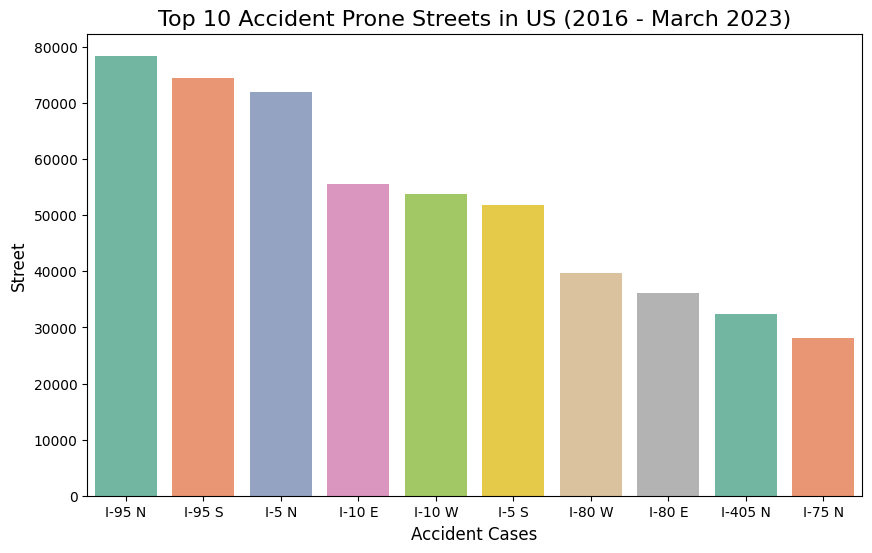

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Cases', y='count', data=top_ten_streets_df, palette='Set2')

plt.title('Top 10 Accident Prone Streets in US (2016 - March 2023)', fontsize=16)
plt.xlabel('Accident Cases', fontsize=12)
plt.ylabel('Street', fontsize=12)
plt.show()
plt.savefig('top_10_streets.png')


## Step 1
Columns_drop

In [13]:
columns_to_drop = ['ID', 'Country', 'Source', 'End_Lat', 'End_Lng', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Street']
df = df.drop(columns=columns_to_drop, axis=1)

## Step 2
Fill null values of city with mode (within state)

In [14]:
# Calculate the mode (most frequent city) for each 'State' group
mode_cities = df.groupby('State')['City'].transform(lambda x: x.mode()[0])

# Fill missing 'City' values with the mode for their respective 'State' group
df['City'].fillna(mode_cities, inplace=True)


## step 3
Mean fill na

In [15]:
# Replace missing values with the mean of their respective states
columns_to_fill = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)']

for column in columns_to_fill:
    df[column] = df[column].fillna(df.groupby('State')[column].transform('mean'))


We have decided to remove the columns 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition', 'Timezone', and 'Sunrise_Sunset' from the dataset. This decision was made because these columns collectively account for approximately 3% of the entire dataset's null values. Despite the removal of rows containing null values in these columns, we are left with a substantial 7,475,297 observations in our dataset, given its large size.

## Step 4
Checking for duplicates

In [16]:
print("Num of duplicates", df.duplicated().sum())
df = df.drop_duplicates()

Num of duplicates 102358


## Step 5
Handling Near Duplicates

In [17]:
print("No. of Weather Conditions:", len(df["Weather_Condition"].unique()))

# To view the complete list of 142 weather descriptions, run the following code
print("\nList of unique weather conditions:", list(df["Weather_Condition"].unique()))

No. of Weather Conditions: 145

List of unique weather conditions: ['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow', 'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow', 'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog', 'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan, 'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog', 'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain', 'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand', 'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy', 'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm', 'Light Rain Shower', 'Light Rain with Thunder', 'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm', 'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow', 'Light Thunderstorms and Snow', 'Heavy Snow', 'Low Drifting Snow', '

In [18]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

## Step 6

Drop null values

In [19]:
columns_to_check = ['Description','Visibility(mi)', 'Wind_Direction','Weather_Condition','Timezone','Sunrise_Sunset']
df.dropna(subset=columns_to_check, inplace=True)


We have replaced the boolean values 'True'->1 and 'False'->0, it will be easier for us to use these data for the next stage

## Step 7

One hot encoding

In [20]:
df = df.replace([True, False], [1, 0])

In [21]:
simple_sanity_check(df)

----------------------------------------------------------------------
No. of Rows: 7374621        No. of Columns: 37
----------------------------------------------------------------------
                  DataType  Missing Values  Missing %  Unique Values
Severity             int64               0        0.0              4
Start_Time          object               0        0.0        5957376
End_Time            object               0        0.0        6506291
Start_Lat          float64               0        0.0        2359092
Start_Lng          float64               0        0.0        2408799
Distance(mi)       float64               0        0.0          21832
Description         object               0        0.0        3651621
City                object               0        0.0          12244
County              object               0        0.0           1813
State               object               0        0.0             49
Zipcode             object               0        0.

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7374621 entries, 0 to 7728393
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   End_Time           object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   Distance(mi)       float64
 6   Description        object 
 7   City               object 
 8   County             object 
 9   State              object 
 10  Zipcode            object 
 11  Timezone           object 
 12  Airport_Code       object 
 13  Weather_Timestamp  object 
 14  Temperature(F)     float64
 15  Wind_Chill(F)      float64
 16  Humidity(%)        float64
 17  Pressure(in)       float64
 18  Visibility(mi)     float64
 19  Wind_Direction     object 
 20  Wind_Speed(mph)    float64
 21  Precipitation(in)  float64
 22  Weather_Condition  object 
 23  Amenity            int64  
 24  Bump               int64  
 25  Crossing           int6

In [23]:
random_sample = df.sample(n=10000)


In [24]:
random_sample.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

## EDA 2, 3, 4

**EDA(2) -> Severity vs. Wind Speed**

**EDA(3) -> Severity vs. Precipitation**

**EDA(4) -> Severity vs. Visibility**

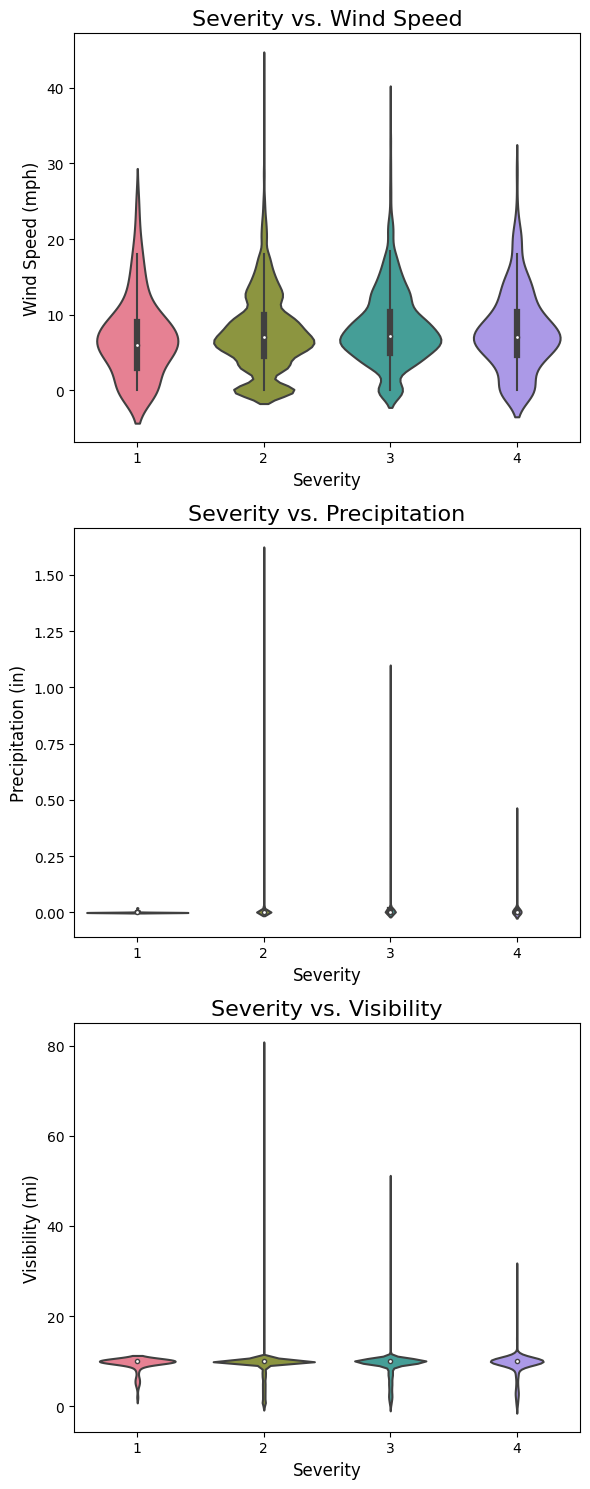

In [25]:
# Change Severity to Category
random_sample['Severity'] = random_sample['Severity'].astype('category')

# Create a set of axes and a figure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 15))

# Violin plot for Wind Speed
sns.violinplot(data=random_sample, x='Severity', y='Wind_Speed(mph)', ax=axes[0], palette="husl")
axes[0].set_title('Severity vs. Wind Speed', fontsize=16)
axes[0].set_ylabel('Wind Speed (mph)', fontsize=12)
axes[0].set_xlabel('Severity', fontsize=12)

# Violin plot for Precipitation
sns.violinplot(data=random_sample, x='Severity', y='Precipitation(in)', ax=axes[1], palette="husl")
axes[1].set_title('Severity vs. Precipitation', fontsize=16)
axes[1].set_ylabel('Precipitation (in)', fontsize=12)
axes[1].set_xlabel('Severity', fontsize=12)

# Violin plot for Visibility
sns.violinplot(data=random_sample, x='Severity', y='Visibility(mi)', ax=axes[2], palette="husl")
axes[2].set_title('Severity vs. Visibility', fontsize=16)
axes[2].set_ylabel('Visibility (mi)', fontsize=12)
axes[2].set_xlabel('Severity', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# Change Severity back to int if needed
random_sample['Severity'] = random_sample['Severity'].astype(int)


In [26]:
# Count the number of cases for each state
state_counts = random_sample["State"].value_counts().reset_index()

# Rename the columns to 'state_code' and 'cases'
state_counts.rename(columns={'index': 'state_code', 'State': 'cases'}, inplace=True)

# Sort the DataFrame by case counts in descending order
state_counts = state_counts.sort_values('cases', ascending=False)


## EDA 5
**Top 10 States with Highest Number of Accidents**

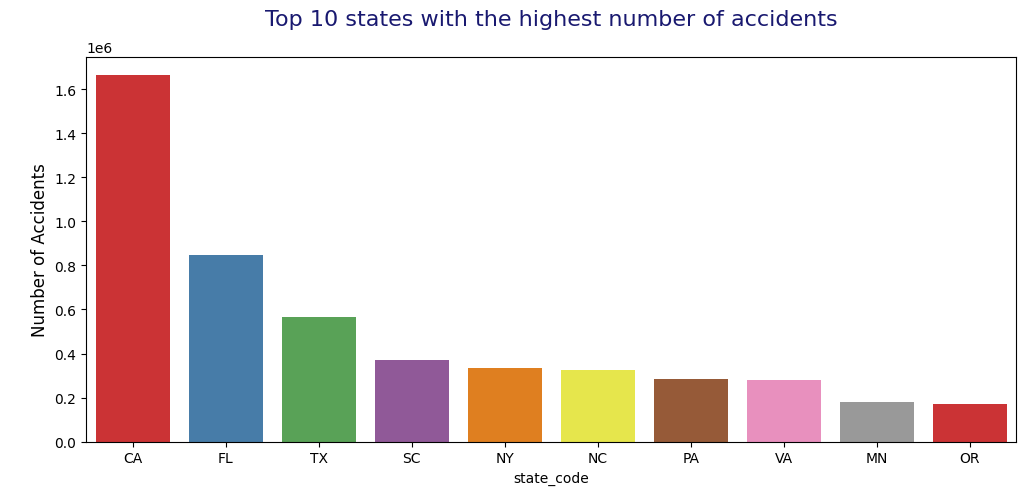

In [27]:
state_counts = df["State"].value_counts()
states = pd.DataFrame(state_counts).reset_index().sort_values('count', ascending=False)
states.rename(columns={'State':'state_code', 'count':'cases'}, inplace=True)
fig, ax = plt.subplots(figsize = (12,5))
top_10 = states[:10]
sns.barplot(x=top_10['state_code'], y=top_10['cases'], palette='Set1')
plt.title("Top 10 states with the highest number of accidents\n", fontdict = {'fontsize':16, 'color':'MidnightBlue'})
plt.ylabel("\nNumber of Accidents", fontdict = {'fontsize':12, 'color':'black'})
plt.savefig("Top 10 states with the highest number of accidents.png")
plt.show()



## EDA - 6
**10 States with Lowest Number of Accidents**


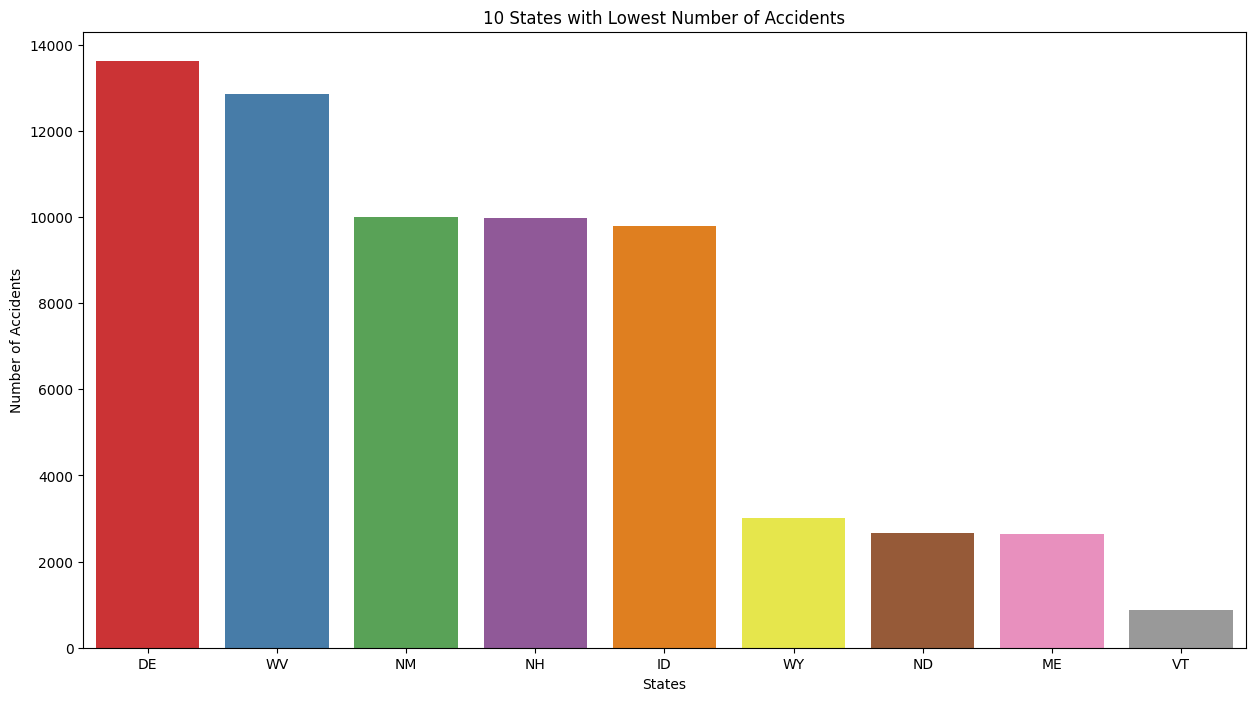

In [28]:
## Observing which states have most accidents
fig,axs = plt.subplots(figsize = (15,8))

x = state_counts[-10:-1].index.to_list()
y = state_counts[-10:-1].values.flatten()

sns.barplot(x=x, y = y, palette='Set1')
axs.tick_params(axis = 'x')
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("States")
plt.title("10 States with Lowest Number of Accidents")
plt.savefig("10 States with Lowest Number of Accidents.png")
plt.show()

## EDA 7
**Top 10 Cities with Highest Number of Accidents**

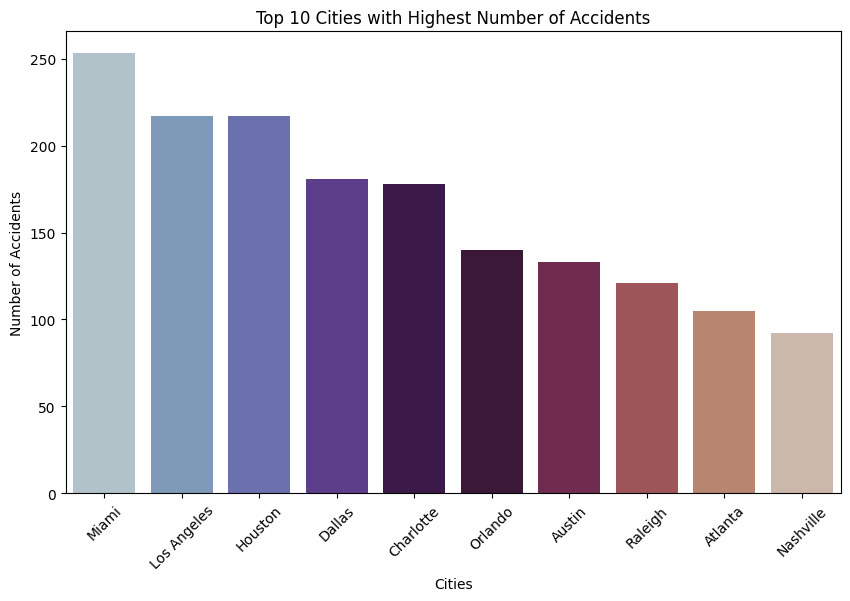

In [29]:
city_acc_counts = pd.DataFrame(random_sample['City'].value_counts()).reset_index()
city_acc_counts.columns = ['City', "Number of Accidents"]
city_acc_counts.sort_values(by='Number of Accidents', ascending=False, inplace=True)
x = city_acc_counts['City'][:10].to_list()
y = city_acc_counts["Number of Accidents"][:10]

# Observing Top 20 cities with the most accidents
fig, axs = plt.subplots(figsize=(10, 6))
sns.barplot(x=x, y=y, ax=axs, palette='twilight')
axs.tick_params(axis='x', rotation=45)
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("Cities")
plt.title("Top 10 Cities with Highest Number of Accidents")
plt.savefig("Top 10 Cities with Highest Number of Accidents.png")
plt.show()


## EDA - 8
**Accidents by Various Road Features and Severity**


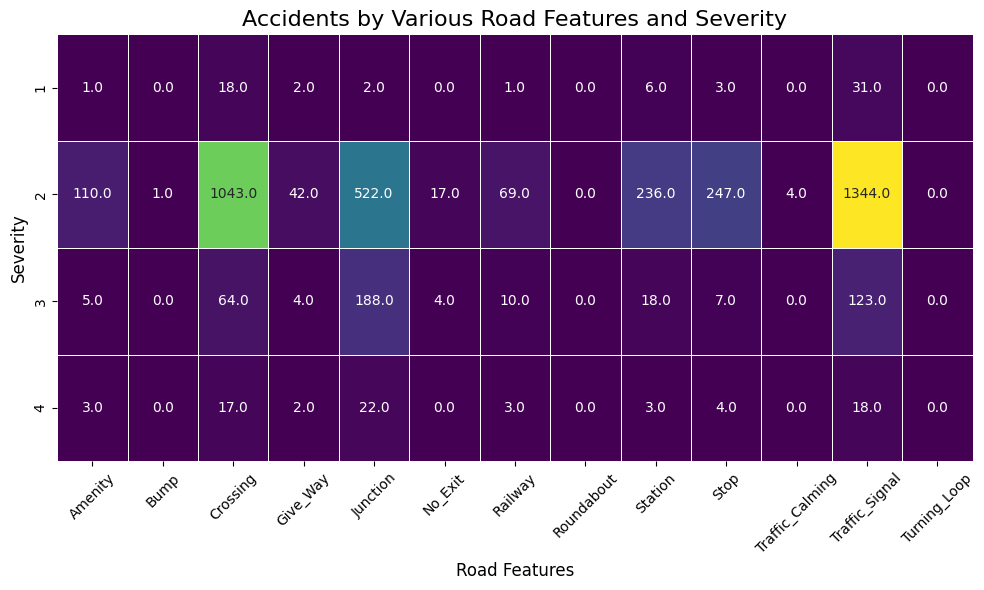

In [30]:
# Create a new dataset with boolean columns and severity
bool_severity_dataset = random_sample[['Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                                      'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                                      'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']].copy()

# Calculate the number of accidents for each combination of severity and boolean columns
accidents_by_bool_severity = bool_severity_dataset.groupby(['Severity']).sum()

# Create a heatmap to visualize the relationship between accident severity and boolean columns
plt.figure(figsize=(10, 6))
sns.heatmap(data=accidents_by_bool_severity, cmap='viridis', annot=True, fmt='.1f', linewidths=.5, cbar=False)
plt.title('Accidents by Various Road Features and Severity', fontsize=16)
plt.xlabel('Road Features', fontsize=12)
plt.ylabel('Severity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Accidents by Various Road Features and Severity.png")
plt.show()


## EDA - 9
**Heatmap for Accidents on USA Map**

In [31]:
! pip install folium 
import folium
from folium.plugins import HeatMap

# Create a folium map centered at a specific location
m = folium.Map(location=[random_sample['Start_Lat'].mean(), random_sample['Start_Lng'].mean()], zoom_start=4.4)

# Convert your data to a list of coordinates
heatmap_data = random_sample[['Start_Lat', 'Start_Lng']].values.tolist()

# Create a HeatMap layer and add it to the folium map
HeatMap(heatmap_data).add_to(m)

# Display the folium map
m


**Just observe how well they will overlap or match with US Accidents**
![This is US population Density Heatmap](https://wellsr.com/python/assets/images/2022-08-19-us-population-heatmap.PNG)



In [32]:
object_columns_df = df.select_dtypes(include=['object']).copy()
# column names to drop from 'df'
columns_to_drop = object_columns_df.columns

# Drop the selected columns from 'df'
df.drop(columns=columns_to_drop, inplace=True)

In [33]:
object_columns_df["Start_Time"].isna().sum()

0

Let's start with some data manipulation, 
Changing the datetime values to different columns, since they are in string format at this point in time.

## Step 8
Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

state_encoder = LabelEncoder()
county_encoder = LabelEncoder()
city_encoder = LabelEncoder()
wind_direction_encoder = LabelEncoder()
weather_condition_encoder = LabelEncoder()
sunrise_sunset_encoder = LabelEncoder()

# Encode each column and add encoded columns to the DataFrame
object_columns_df["State_LabelEncoded"] = state_encoder.fit_transform(object_columns_df["State"])
object_columns_df["County_LabelEncoded"] = county_encoder.fit_transform(object_columns_df["County"])
object_columns_df["City_LabelEncoded"] = city_encoder.fit_transform(object_columns_df["City"])
object_columns_df["Wind_Direction_LabelEncoded"] = wind_direction_encoder.fit_transform(object_columns_df["Wind_Direction"])
object_columns_df["Weather_Condition_LabelEncoded"] = weather_condition_encoder.fit_transform(object_columns_df["Weather_Condition"])
object_columns_df["Sunrise_Sunset_LabelEncoded"] = sunrise_sunset_encoder.fit_transform(object_columns_df["Sunrise_Sunset"])

In [35]:
encoded_state_value = 5  # Replace with the label you want to inverse transform
original_state_category = wind_direction_encoder.inverse_transform([encoded_state_value])[0]
print(f"Encoded value {encoded_state_value} corresponds to State: {original_state_category}")


Encoded value 5 corresponds to State: East


In [36]:
object_columns_df

,Start_Time,End_Time,Description,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,State_LabelEncoded,County_LabelEncoded,City_LabelEncoded,Wind_Direction_LabelEncoded,Weather_Condition_LabelEncoded,Sunrise_Sunset_LabelEncoded
0,2016-02-08 05:46:00,2016-02-08 11:00:00,Right lane blocked due to accident on I-70 Eas...,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,Calm,Rain,Night,33,1092,2612,1,4,1
1,2016-02-08 06:07:59,2016-02-08 06:37:59,Accident on Brice Rd at Tussing Rd. Expect del...,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,Calm,Rain,Night,33,578,9142,1,4,1
2,2016-02-08 06:49:27,2016-02-08 07:19:27,Accident on OH-32 State Route 32 Westbound at ...,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,SW,Cloudy,Night,33,335,11951,16,1,1
3,2016-02-08 07:23:34,2016-02-08 07:53:34,Accident on I-75 Southbound at Exits 52 52B US...,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,SW,Cloudy,Night,33,1092,2612,16,1,1
4,2016-02-08 07:39:07,2016-02-08 08:09:07,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,SW,Cloudy,Day,33,1092,2612,16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2019-08-23 18:03:25,2019-08-23 18:32:01,At Market St - Accident.,Riverside,Riverside,CA,92501,US/Pacific,KRAL,2019-08-23 17:53:00,W,Clear,Day,3,1365,9250,20,0,0
7728390,2019-08-23 19:11:30,2019-08-23 19:38:23,At Camino Del Rio/Mission Center Rd - Accident.,San Diego,San Diego,CA,92108,US/Pacific,KMYF,2019-08-23 18:53:00,SW,Clear,Day,3,1425,9652,16,0,0
7728391,2019-08-23 19:00:21,2019-08-23 19:28:49,At Glassell St/Grand Ave - Accident. in the ri...,Orange,Orange,CA,92866,US/Pacific,KSNA,2019-08-23 18:53:00,SSW,Cloudy,Day,3,1197,8088,15,1,0
7728392,2019-08-23 19:00:21,2019-08-23 19:29:42,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,Culver City,Los Angeles,CA,90230,US/Pacific,KSMO,2019-08-23 18:51:00,SW,Clear,Day,3,944,2497,16,0,0


In [37]:
#  I think we made a mistake rather than headlessly converting the timezone we should have converted them to UTC
object_columns_df.Timezone.unique()

array(['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain'],
      dtype=object)

In [38]:
object_columns_df['Start_Time'].isna().sum()

0

## EDA - 10
**Accidents by Hour of the Day**

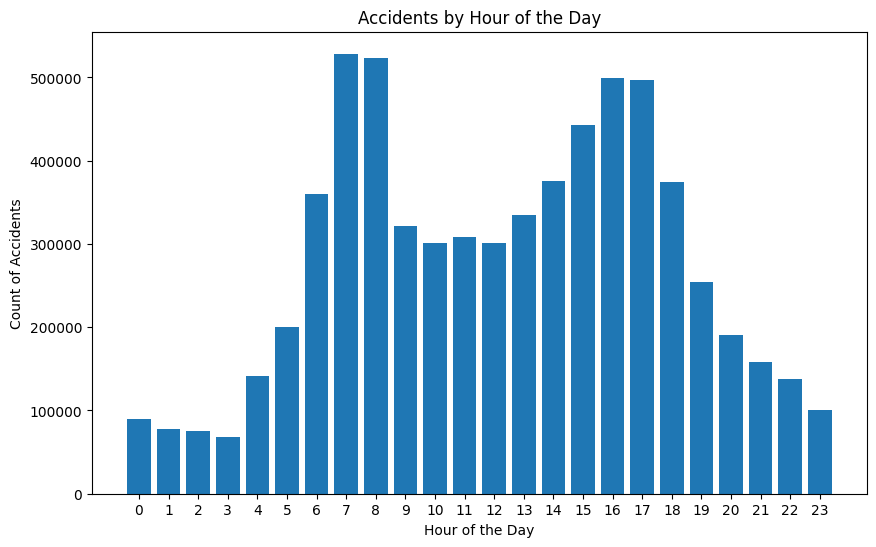

In [39]:
object_columns_df['Start_Time'] = pd.to_datetime(object_columns_df['Start_Time'] , errors='coerce')


hour_df = pd.DataFrame(object_columns_df.Start_Time.dt.hour.value_counts()).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(hour_df['Start_Time'], hour_df['count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Accidents')
plt.title('Accidents by Hour of the Day')
plt.xticks(hour_df['Start_Time'])
plt.savefig("Accidents by Hour of the Day.png")
plt.show()

## Step 9
Feature Transformation
changing timezones to UTC for consistency

In [40]:
# Convert "End_Time" to datetime objects with error handling
object_columns_df["End_Time"] = pd.to_datetime(object_columns_df["End_Time"], errors='coerce')

# Define a dictionary mapping timezones to UTC offsets (hours)
timezone_offsets = {
    'US/Eastern': -5,   # Eastern Time (ET) UTC offset
    'US/Pacific': -8,   # Pacific Time (PT) UTC offset
    'US/Central': -6,   # Central Time (CT) UTC offset
    'US/Mountain': -7,  # Mountain Time (MT) UTC offset
    # Add more timezone offsets as needed
}

# Use NumPy broadcasting to add the corresponding UTC offset to "End_Time"
object_columns_df["End_Time_UTC"] = object_columns_df["End_Time"] + pd.to_timedelta(object_columns_df["Timezone"].map(timezone_offsets), unit='h')

# Convert "Start_Time" to datetime objects
object_columns_df["Start_Time"] = pd.to_datetime(object_columns_df["Start_Time"], errors='coerce')

# Use NumPy broadcasting to add the corresponding UTC offset to "Start_Time"
object_columns_df["Start_Time_UTC"] = object_columns_df["Start_Time"] + pd.to_timedelta(object_columns_df["Timezone"].map(timezone_offsets), unit='h')


In [41]:
object_columns_df.columns

Index(['Start_Time', 'End_Time', 'Description', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'State_LabelEncoded', 'County_LabelEncoded', 'City_LabelEncoded',
       'Wind_Direction_LabelEncoded', 'Weather_Condition_LabelEncoded',
       'Sunrise_Sunset_LabelEncoded', 'End_Time_UTC', 'Start_Time_UTC'],
      dtype='object')

In [42]:
object_columns_df.dropna(subset=["Timezone"], inplace=True)

## Step 10
Feature engineering

In [43]:
def extract_datetime_components(df, column_name):
    
    # Extract datetime components
    df[f'{column_name}_year'] = df[column_name].dt.year.astype(float)
    df[f'{column_name}_month'] = df[column_name].dt.month.astype(float)
    df[f'{column_name}_day'] = df[column_name].dt.day.astype(float)
    df[f'{column_name}_hour'] = df[column_name].dt.hour.astype(float)
    df[f'{column_name}_minute'] = df[column_name].dt.minute.astype(float)
    df[f'{column_name}_second'] = df[column_name].dt.second.astype(float)
    
    return df


In [44]:
object_columns_df = extract_datetime_components(object_columns_df, 'End_Time_UTC')
object_columns_df = extract_datetime_components(object_columns_df, 'Start_Time_UTC')

In [45]:
object_columns_df.columns

Index(['Start_Time', 'End_Time', 'Description', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'State_LabelEncoded', 'County_LabelEncoded', 'City_LabelEncoded',
       'Wind_Direction_LabelEncoded', 'Weather_Condition_LabelEncoded',
       'Sunrise_Sunset_LabelEncoded', 'End_Time_UTC', 'Start_Time_UTC',
       'End_Time_UTC_year', 'End_Time_UTC_month', 'End_Time_UTC_day',
       'End_Time_UTC_hour', 'End_Time_UTC_minute', 'End_Time_UTC_second',
       'Start_Time_UTC_year', 'Start_Time_UTC_month', 'Start_Time_UTC_day',
       'Start_Time_UTC_hour', 'Start_Time_UTC_minute',
       'Start_Time_UTC_second'],
      dtype='object')

In [46]:
year_df = pd.DataFrame(object_columns_df.Start_Time_UTC.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time_UTC':'Cases'}).sort_values(by='Cases', ascending=True)


In [47]:
year_df['accident/day'] = year_df['count'] / 365

# Calculate cases per hour (assuming 365 days, 24 hours in a day)
year_df['accident/hour'] = year_df['count'] / (365 * 24)

## EDA - 11, 12

**EDA(11) -> Average Cases of Accident/hour in US (2016- March 2023)**
**EDA(12) -> Average Cases of Accident/Day in US (2016- March 2023)**

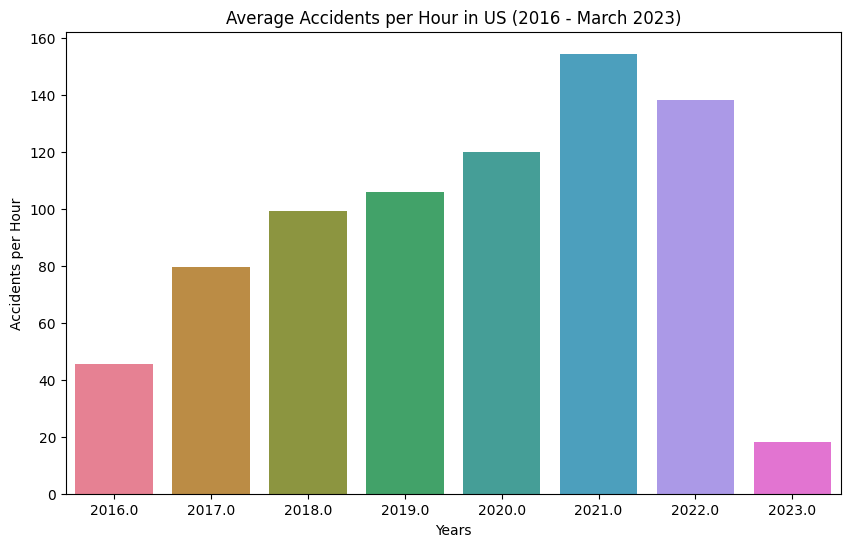

In [48]:
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.barplot(x=year_df['Cases'], y=year_df['accident/hour'], palette='husl')
plt.title("Average Accidents per Hour in US (2016 - March 2023)")
plt.xlabel("Years")
plt.ylabel("Accidents per Hour")
plt.savefig("Average Accidents per Hour in US (2016 - March 2023).png")
plt.show()


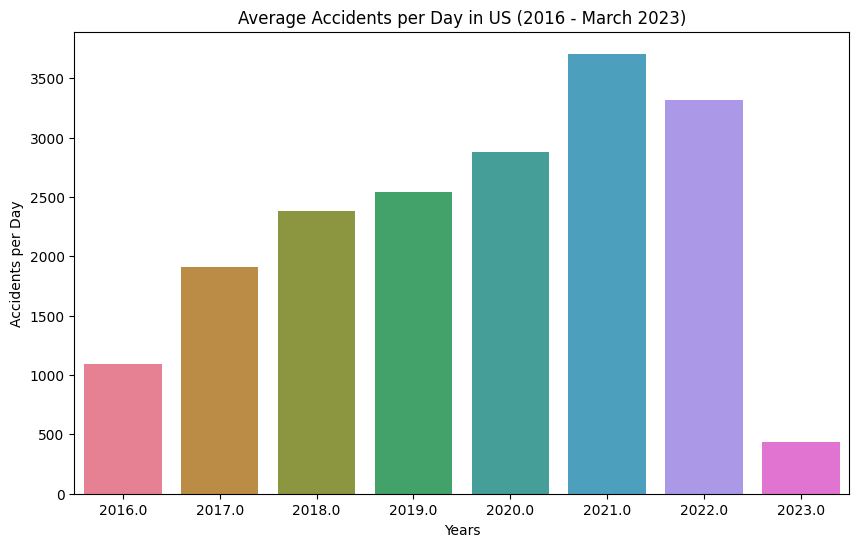

In [49]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=year_df['Cases'], y=year_df['accident/day'], palette='husl')
plt.title("Average Accidents per Day in US (2016 - March 2023)")
plt.xlabel("Years")
plt.ylabel("Accidents per Day")
plt.savefig("Average Accidents per Day in US (2016 - March 2023).png")
plt.show()


In [50]:
import calendar
month_df = pd.DataFrame(object_columns_df.Start_Time_UTC.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time_UTC':'Cases'})

month_names = list(calendar.month_name)[1:]
month_df['Month'] = month_names

## EDA - 13
**Road Accident Percentage for different months in US (2016 - March 2023)**

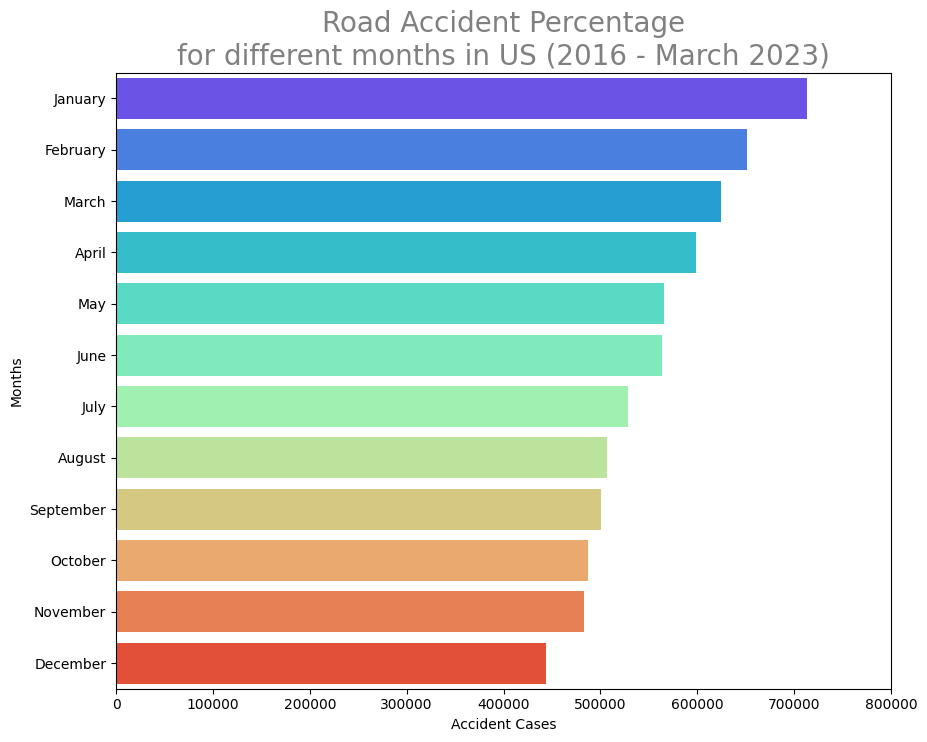

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors

fig, ax = plt.subplots(figsize=(10, 8))

# Change the colormap to 'viridis'
cmap = cm.get_cmap('viridis', 12)
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax = sns.barplot(x=month_df['count'], y=month_df['Month'], palette='rainbow')
plt.title('Road Accident Percentage\nfor different months in US (2016 - March 2023)', size=20, color='grey')
plt.xlabel('Accident Cases')
plt.ylabel('Months')
plt.xlim(0, 800000)
plt.savefig("Road Accident Percentage for different months in US (2016 - March 2023).png")
plt.show()


In [52]:
object_columns_df.drop(
    ['State', 'County','Start_Time', 'End_Time', 'Weather_Timestamp', 'Sunrise_Sunset', 
     'Weather_Condition', 'Wind_Direction', 'Timezone', 'Airport_Code', 'Description',
    'End_Time_UTC', 'Start_Time_UTC', 'City', 'Zipcode'], axis=1, inplace=True)

In [53]:
object_columns_df

,State_LabelEncoded,County_LabelEncoded,City_LabelEncoded,Wind_Direction_LabelEncoded,Weather_Condition_LabelEncoded,Sunrise_Sunset_LabelEncoded,End_Time_UTC_year,End_Time_UTC_month,End_Time_UTC_day,End_Time_UTC_hour,End_Time_UTC_minute,End_Time_UTC_second,Start_Time_UTC_year,Start_Time_UTC_month,Start_Time_UTC_day,Start_Time_UTC_hour,Start_Time_UTC_minute,Start_Time_UTC_second
0,33,1092,2612,1,4,1,2016.0,2.0,8.0,6.0,0.0,0.0,2016.0,2.0,8.0,0.0,46.0,0.0
1,33,578,9142,1,4,1,2016.0,2.0,8.0,1.0,37.0,59.0,2016.0,2.0,8.0,1.0,7.0,59.0
2,33,335,11951,16,1,1,2016.0,2.0,8.0,2.0,19.0,27.0,2016.0,2.0,8.0,1.0,49.0,27.0
3,33,1092,2612,16,1,1,2016.0,2.0,8.0,2.0,53.0,34.0,2016.0,2.0,8.0,2.0,23.0,34.0
4,33,1092,2612,16,1,0,2016.0,2.0,8.0,3.0,9.0,7.0,2016.0,2.0,8.0,2.0,39.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,3,1365,9250,20,0,0,2019.0,8.0,23.0,10.0,32.0,1.0,2019.0,8.0,23.0,10.0,3.0,25.0
7728390,3,1425,9652,16,0,0,2019.0,8.0,23.0,11.0,38.0,23.0,2019.0,8.0,23.0,11.0,11.0,30.0
7728391,3,1197,8088,15,1,0,2019.0,8.0,23.0,11.0,28.0,49.0,2019.0,8.0,23.0,11.0,0.0,21.0
7728392,3,944,2497,16,0,0,2019.0,8.0,23.0,11.0,29.0,42.0,2019.0,8.0,23.0,11.0,0.0,21.0


In [54]:
# check when you run next time if 
# timestamps_UTC are still there and remove them

In [55]:
df = pd.concat([object_columns_df, df], axis=1)

In [56]:
df.head()

,State_LabelEncoded,County_LabelEncoded,City_LabelEncoded,Wind_Direction_LabelEncoded,Weather_Condition_LabelEncoded,Sunrise_Sunset_LabelEncoded,End_Time_UTC_year,End_Time_UTC_month,End_Time_UTC_day,End_Time_UTC_hour,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,33,1092,2612,1,4,1,2016.0,2.0,8.0,6.0,...,0,0,0,0,0,0,0,0,0,0
1,33,578,9142,1,4,1,2016.0,2.0,8.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,33,335,11951,16,1,1,2016.0,2.0,8.0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,33,1092,2612,16,1,1,2016.0,2.0,8.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,33,1092,2612,16,1,0,2016.0,2.0,8.0,3.0,...,0,0,0,0,0,0,0,0,1,0


## EDA - 14
**Accidents by Severity per Year**

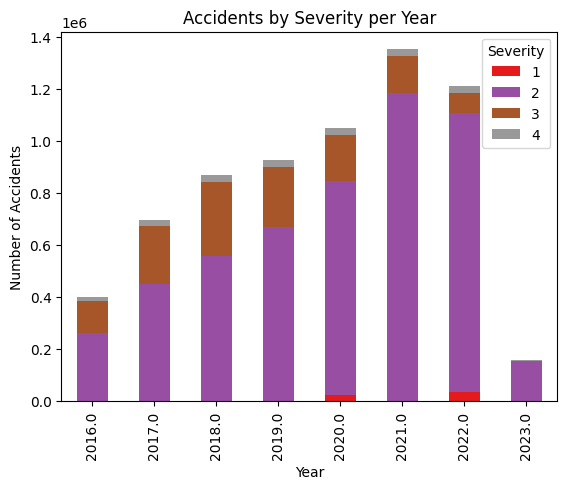

In [57]:
# Perform groupby operation
severity_grouped = df.groupby(['End_Time_UTC_year', 'Severity'])['Start_Lat'].count()

# Convert the result to a DataFrame
severity_df = severity_grouped.reset_index()

# Pivot the DataFrame
severity_pivot = severity_df.pivot(index='End_Time_UTC_year', columns='Severity', values='Start_Lat')

# Plot the stacked bar chart with a different colormap
ax = severity_pivot.plot.bar(stacked=True, colormap='Set1')

# Set the title and axis labels
plt.title("Accidents by Severity per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.savefig("Accidents by Severity per Year.png")
# Show the plot
plt.show()


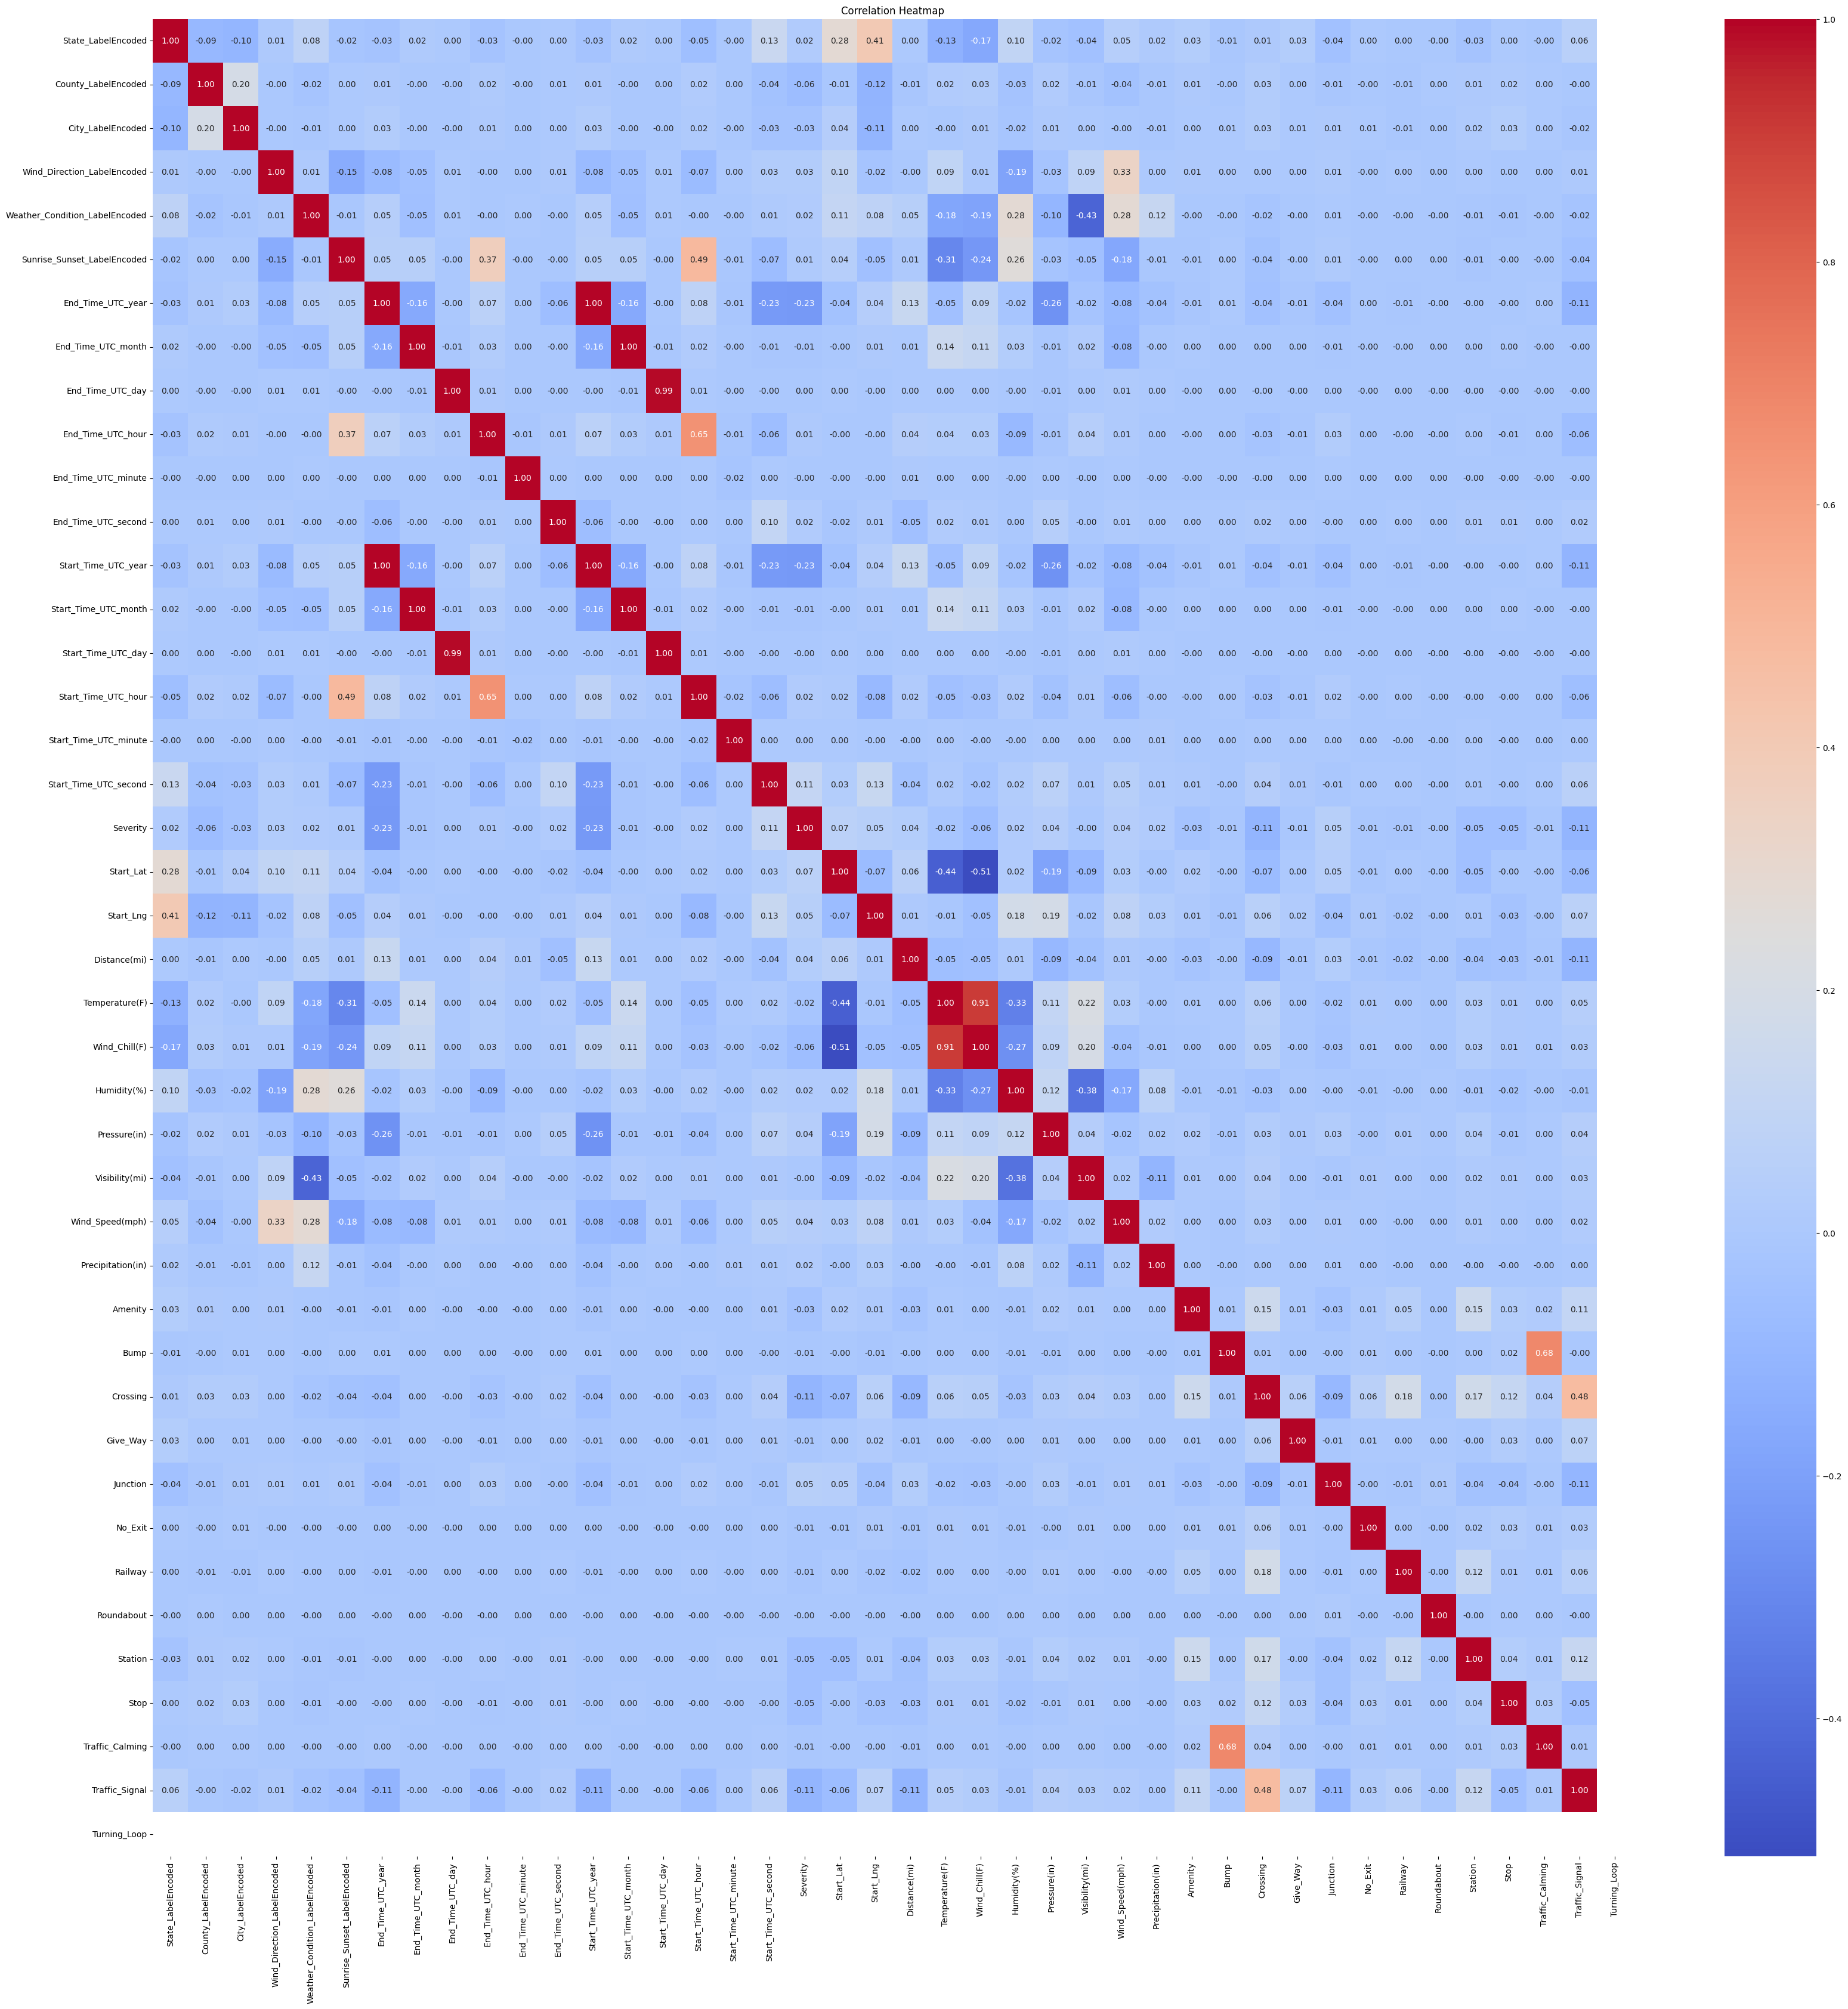

In [58]:
data = df  

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("Correlation Heatmap.png")
plt.show()


In [59]:
# Create a mask for upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Fill the upper triangular matrix with True for highly correlated columns
highly_correlated = correlation_matrix.mask(mask).abs() > 0.80


# Find the columns to drop
columns_to_drop = [col for col in highly_correlated.columns if any(highly_correlated[col])]

# Print the columns that are being dropped
print("Columns to drop due to high correlation:", columns_to_drop)

# Drop the highly correlated columns from the DataFrame
data = data.drop(columns=columns_to_drop)

Columns to drop due to high correlation: ['End_Time_UTC_year', 'End_Time_UTC_month', 'End_Time_UTC_day', 'Temperature(F)']


The data is imbalanced so we'll balance the data. Out of the 4 severity levels, we'll see which one has the lowest records and drop records from other classes, to balance the data.

In [60]:
data = data.dropna()

In [61]:
import copy
copied_data = copy.deepcopy(data)

Making a copy of the whole data to run on a similar model, to showcase that these subpar accuracies are because of smaller data selected.

In [62]:
min_value_count = min(data[["Severity"]].value_counts())

Data was too large it was compuattionally impossible to train 6 or more models, so we are just taking 1000 from each severity class.

## Downsampling

In [63]:
min_count = 1000
value_counts = data["Severity"].value_counts()
to_drop = []
for val, count in value_counts.items():
    if count > min_count:
        to_drop.extend(data[data["Severity"] == val].sample(count - min_count).index)

one_hot_encoded = pd.get_dummies(data, columns=["Severity"])
balanced_data = one_hot_encoded.drop(to_drop)

# Combining one-hot encoded columns back to a single column
severity_columns = [col for col in balanced_data.columns if col.startswith("Severity")]
balanced_data["Severity"] = balanced_data[severity_columns].idxmax(axis=1).str.replace('Severity_', '')

# Dropping the individual severity columns
balanced_data = balanced_data.drop(columns=severity_columns)

# Checking the value counts of the combined Severity column
print(balanced_data["Severity"].value_counts())

# Checking the shape of the balanced data
print(balanced_data.shape)


Severity
3    1000
1    1000
2    1000
4    1000
Name: count, dtype: int64
(4000, 38)


Since, This dataset contains records about accidents, we can't make a model, whether an accident is going to take place or not.
But we can predict the severity of accidents if you get into one.

So going forward our dependent feature will be Severity and all the other features will be independent features.

In [64]:
balanced_data.isna().sum()

State_LabelEncoded                0
County_LabelEncoded               0
City_LabelEncoded                 0
Wind_Direction_LabelEncoded       0
Weather_Condition_LabelEncoded    0
Sunrise_Sunset_LabelEncoded       0
End_Time_UTC_hour                 0
End_Time_UTC_minute               0
End_Time_UTC_second               0
Start_Time_UTC_year               0
Start_Time_UTC_month              0
Start_Time_UTC_day                0
Start_Time_UTC_hour               0
Start_Time_UTC_minute             0
Start_Time_UTC_second             0
Start_Lat                         0
Start_Lng                         0
Distance(mi)                      0
Wind_Chill(F)                     0
Humidity(%)                       0
Pressure(in)                      0
Visibility(mi)                    0
Wind_Speed(mph)                   0
Precipitation(in)                 0
Amenity                           0
Bump                              0
Crossing                          0
Give_Way                    

In [65]:
balanced_data.shape

(4000, 38)

In [66]:
Y = balanced_data[["Severity"]]
X = balanced_data.drop("Severity", axis = 1)

Now to prevent information leak from testing, we'll split the data first then perform all the operation on X_train and similar operation on X_test.

[This link clearly shows that the data should be splitted first then any transformation should be done on both the train and test data](https://datascience.stackexchange.com/questions/13610/dimension-reduction-after-or-before-train-test-split)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Now let's normalize the data and reduce the dimensions.

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [69]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.041667,0.697790,0.905398,0.434783,0.0,0.0,0.434783,0.169492,0.067797,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.041667,0.697790,0.905398,0.521739,0.0,0.0,0.130435,0.372881,0.152542,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.645833,0.288398,0.265706,0.000000,0.1,0.0,1.000000,0.220339,0.152542,0.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.062500,0.786188,0.388566,0.608696,0.0,1.0,0.869565,0.423729,0.152542,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.187500,0.325967,0.030879,0.000000,0.0,1.0,0.130435,0.254237,0.000000,0.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


Feature ranking:
1. Feature 17 - 0.16113489765414762
2. Feature 9 - 0.09747753707980619
3. Feature 18 - 0.0530737250481938
4. Feature 16 - 0.050838721147892486
5. Feature 10 - 0.04618900166924728
6. Feature 14 - 0.04541141601672668
7. Feature 15 - 0.04394437270640598
8. Feature 20 - 0.04280632896021196
9. Feature 19 - 0.03515603009121973
10. Feature 6 - 0.034951220407823856
11. Feature 2 - 0.034193981426900666
12. Feature 1 - 0.033981518141739345
13. Feature 8 - 0.03157698455082537
14. Feature 13 - 0.030574433310372004
15. Feature 0 - 0.03008352988141793
16. Feature 7 - 0.03001818560423693
17. Feature 11 - 0.028604265409430507
18. Feature 22 - 0.02831843117641876
19. Feature 12 - 0.027794717857251794
20. Feature 23 - 0.027220910716031135
21. Feature 3 - 0.024429104341582266
22. Feature 35 - 0.017057632206463336
23. Feature 4 - 0.011395561836233256
24. Feature 21 - 0.009065720966555927
25. Feature 26 - 0.008974576763537344
26. Feature 5 - 0.005754648701985206
27. Feature 28 - 0.00363994

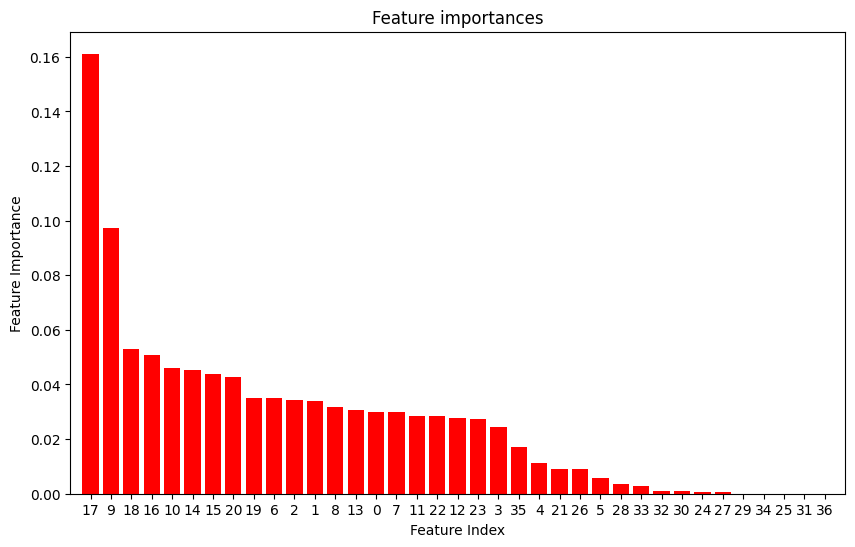

In [72]:
# Fit the RandomForestClassifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Get feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} - {importances[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.show()


Since, there are 40 columns, which is way too much...We'll reduce the dimension with PCA.

In [73]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

principal_components = pca.components_

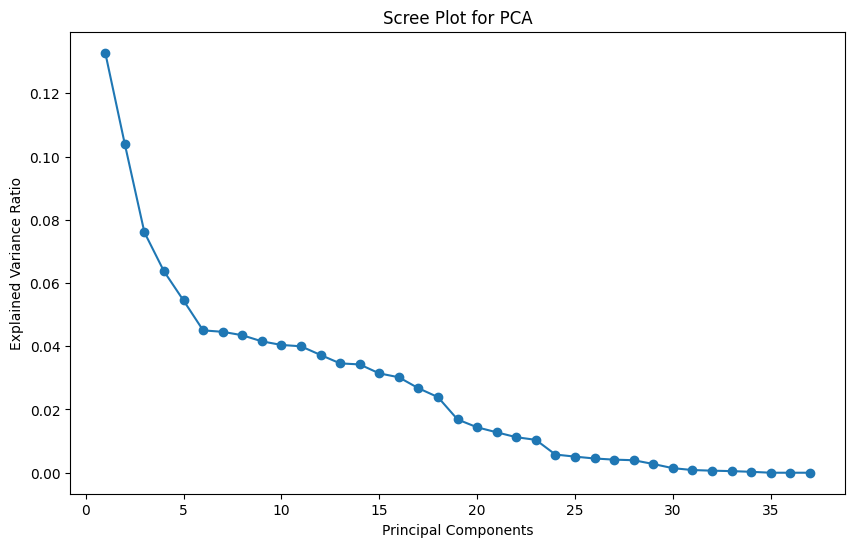

In [74]:
num_components = len(explained_variance_ratio)
index = np.arange(num_components)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(index + 1, explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

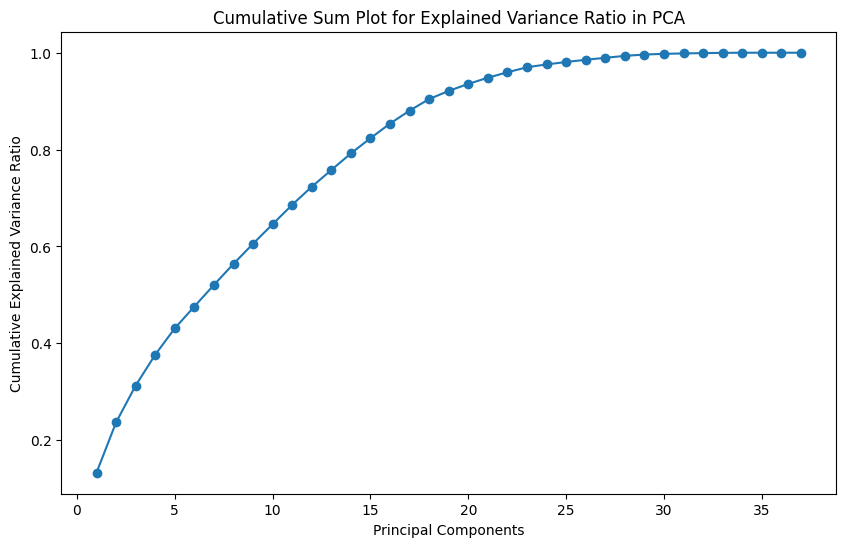

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(index + 1, cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Sum Plot for Explained Variance Ratio in PCA')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

We can see that elbow actually doesn't come. But it loosely follows elbow. 

So with the help of these plots we have decided to choose 20 components which will still have >90% variance, but reduce the dimension to half.

Even though a rule of thumb says that after dimensionality reduction you should have 1/6th of your total features. But if we would choose something like that we would be loosing lot of information.

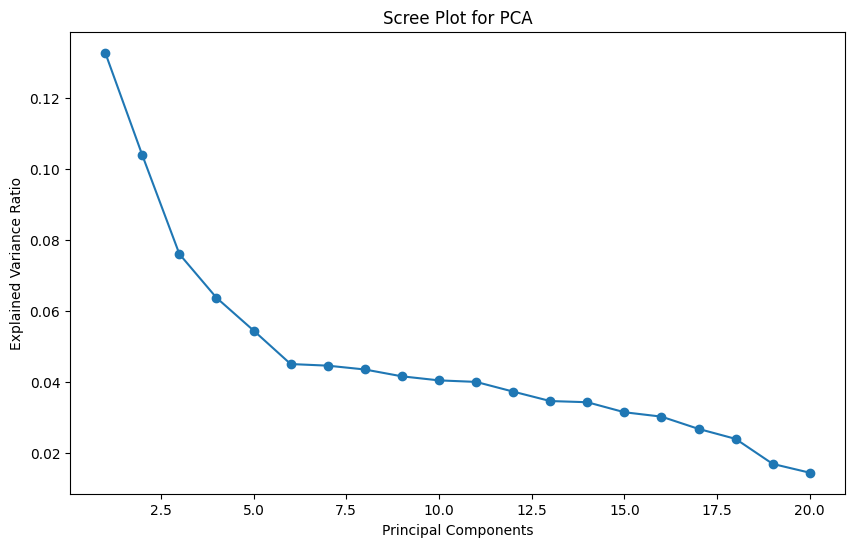

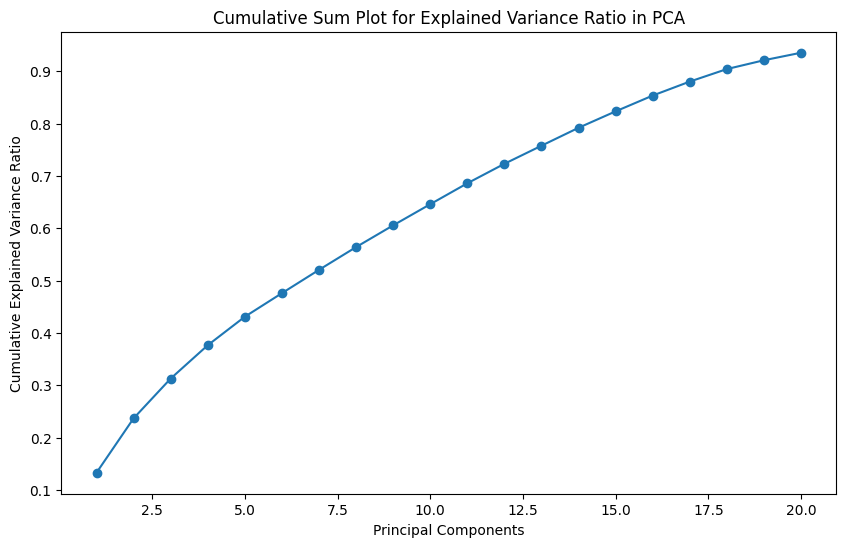

In [76]:
pca = PCA(n_components=20)
pca.fit(X_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

principal_components = pca.components_

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

num_components = len(explained_variance_ratio)
index = np.arange(num_components)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(index + 1, explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(index + 1, cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Sum Plot for Explained Variance Ratio in PCA')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


In [77]:
pd.DataFrame(X_train_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.708816,1.166740,0.628867,-0.421992,0.143229,-0.341513,-0.029873,0.040191,0.246813,-0.057491,0.192464,-0.341602,0.020116,-0.155969,-0.029629,0.018164,0.062782,-0.289784,0.057588,0.095451
1,-0.904416,1.055813,0.558287,-0.383514,0.035547,-0.091547,0.020178,-0.082045,-0.126620,-0.125469,0.372404,-0.048747,-0.013356,-0.026608,-0.023820,0.074143,0.053350,-0.284355,0.062565,0.120561
2,0.245767,-0.079597,-0.023342,0.029282,0.001907,0.714327,0.046457,0.315231,0.237016,-0.196055,-0.350144,-0.997966,-0.070397,0.177719,0.175562,-0.241534,0.256781,0.540122,0.010214,-0.129927
3,0.960750,0.269440,0.661710,-0.250426,0.372882,-0.062081,-0.189493,0.101792,0.039412,-0.241538,-0.178510,-0.074775,-0.189074,0.112289,0.075451,0.031604,-0.233239,-0.005703,-0.061801,0.023979
4,0.863304,0.122142,-0.182673,-0.808087,-0.144552,0.097768,-0.391499,-0.115972,0.106210,0.643831,0.080814,-0.171469,0.113500,-0.163435,0.031492,-0.057324,-0.170664,-0.021909,0.081451,-0.336352


In [78]:
X_test_pca.shape

(1200, 20)

We tried to do random sampling from the data because we have low computation power, so we thought maybe we can randomly sample, keeping the classes equal and train the model with sufficient amount to data, so it could be trained faster.
However, this was a mistake...Since we have applied PCA, which means each feature has been changed to principal components and each value has been changed correspondigly, by choosing random samples of data.
These data values are the projection on principal components, so by randomly selecting and throwing away the other values.We were destroying the thing what was making the principal components. Since principal components were made by maximizing these variance. Therefore we decided to split the data first and then do PCA on both train and test.

We also looked up on the internet and found the link that was mentioned above, that indeed this is the right way, to split the data first and then do scaling and all the other transformations.

In [79]:
y_train.value_counts()

Severity
1           709
2           704
3           700
4           687
Name: count, dtype: int64

In [80]:
X_train = X_train_pca
X_test = X_test_pca

In [81]:
y_train["Severity"] = y_train["Severity"].astype(int)
y_test["Severity"] = y_test["Severity"].astype(int)

# Modeling

## Model 1 
## Random Forest Classifier 

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


Feature ranking:
1. Feature 0 - 0.08060863262459764
2. Feature 1 - 0.06691458084905327
3. Feature 15 - 0.060132404608965684
4. Feature 3 - 0.05928130428237822
5. Feature 18 - 0.053082069544408216
6. Feature 14 - 0.05098016553505271
7. Feature 9 - 0.050308948784329795
8. Feature 2 - 0.04967895220561915
9. Feature 4 - 0.04614203809901201
10. Feature 5 - 0.04567108541049545
11. Feature 6 - 0.045202319802724066
12. Feature 12 - 0.045064279253844
13. Feature 11 - 0.04505862848517725
14. Feature 7 - 0.04490904880496628
15. Feature 8 - 0.04455804323488818
16. Feature 13 - 0.04372906523821413
17. Feature 19 - 0.0432070982446717
18. Feature 17 - 0.042867331331527765
19. Feature 10 - 0.041992276680430735
20. Feature 16 - 0.04061172697964376


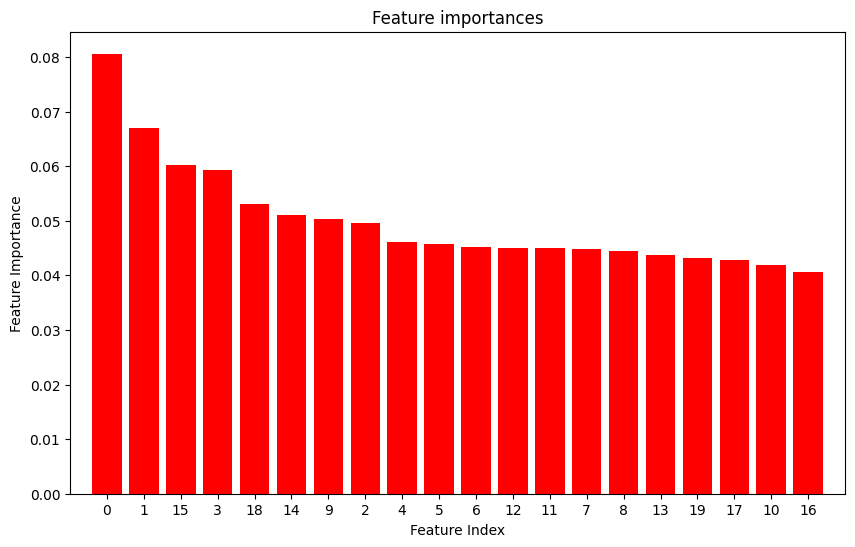

In [83]:
# Fit the RandomForestClassifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Get feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} - {importances[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.show()


We did PCA so the first component must be most important.

This graph shows that how the PCA condensed all the information available before and now all that information could be accessed only by 20 or so columns.

Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.73      0.66       291
           2       0.44      0.39      0.41       296
           3       0.44      0.49      0.46       300
           4       0.48      0.38      0.42       313

    accuracy                           0.49      1200
   macro avg       0.49      0.50      0.49      1200
weighted avg       0.49      0.49      0.49      1200



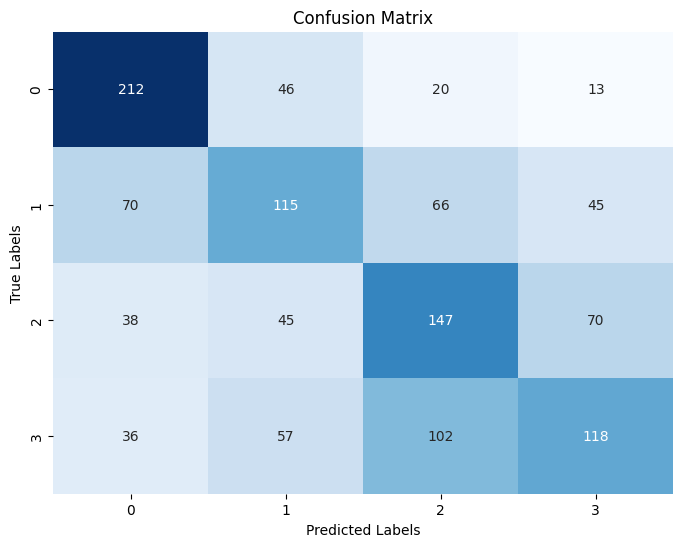

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


confusion_mat = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The accuracy is pretty bad, This model is only able to classify Severity - 1 accidents (True label - 0) properly.

## Model - 2 

## Support Vector Machine (Classifier)

In [85]:
from sklearn.svm import SVC

# Create an instance of the SVC classifier
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr', probability=True)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

Accuracy of the SVM classifier: 0.47
Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.76      0.63       291
           2       0.43      0.23      0.30       296
           3       0.45      0.51      0.48       300
           4       0.44      0.41      0.42       313

    accuracy                           0.47      1200
   macro avg       0.46      0.48      0.46      1200
weighted avg       0.46      0.47      0.45      1200



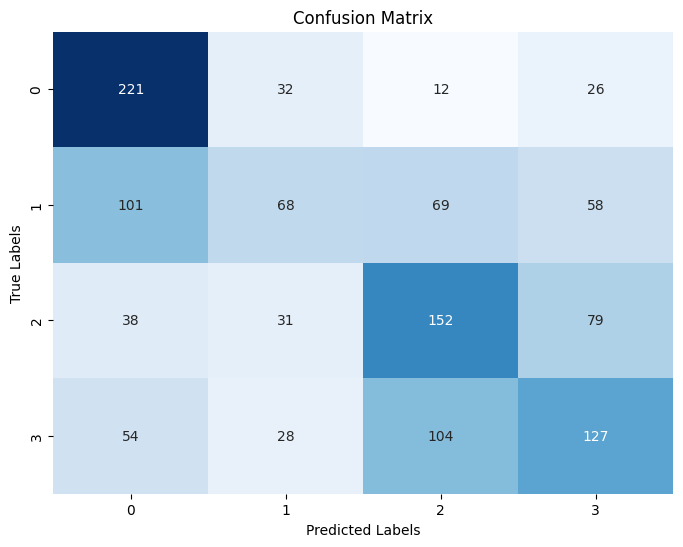

In [86]:
# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Model - 3 
## Decision Tree Classifier 

Accuracy of the Decision Tree classifier: 0.37
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           1       0.47      0.55      0.51       291
           2       0.31      0.27      0.29       296
           3       0.33      0.32      0.32       300
           4       0.36      0.35      0.36       313

    accuracy                           0.37      1200
   macro avg       0.37      0.37      0.37      1200
weighted avg       0.37      0.37      0.37      1200



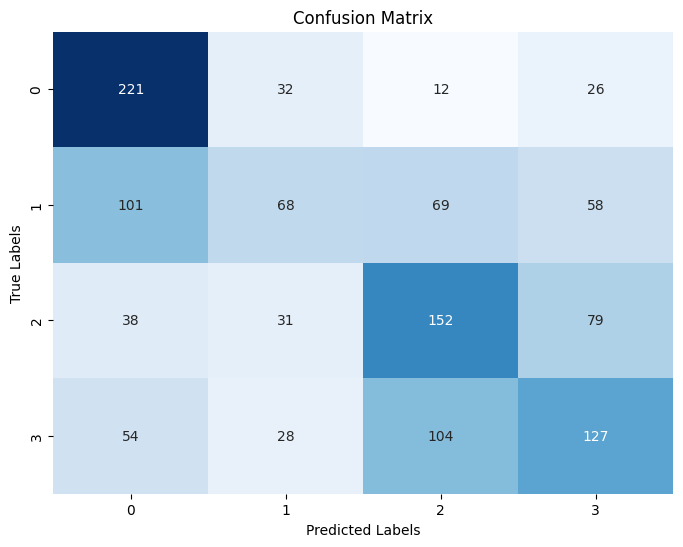

In [87]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict the labels for the scaled test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate the accuracy of the Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of the Decision Tree classifier: {accuracy_dt:.2f}")

# Print the classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

confusion_mat = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Decision Tree has the worst accuracy out of all the other models

## Model 4 
## K - Nearest Neighbour Classifer

Accuracy of the K-NN model: 0.44
Classification Report:
               precision    recall  f1-score   support

           1       0.51      0.75      0.61       291
           2       0.37      0.35      0.36       296
           3       0.41      0.42      0.42       300
           4       0.46      0.27      0.34       313

    accuracy                           0.44      1200
   macro avg       0.44      0.45      0.43      1200
weighted avg       0.44      0.44      0.43      1200



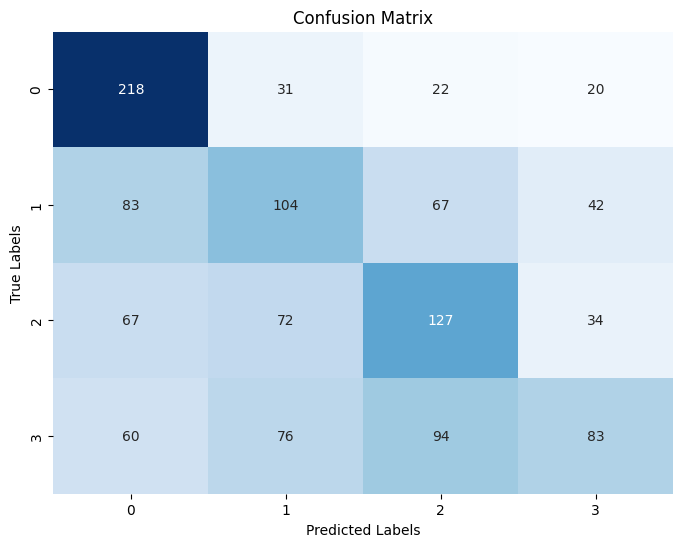

In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the appropriate value of k

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the K-NN model: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", class_report)

confusion_mat = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Model - 5 
## Gradient Boosting Classifer

Accuracy of the GBM model: 0.50
Classification Report for GBM:
               precision    recall  f1-score   support

           1       0.62      0.73      0.67       291
           2       0.45      0.37      0.41       296
           3       0.44      0.49      0.46       300
           4       0.46      0.41      0.43       313

    accuracy                           0.50      1200
   macro avg       0.49      0.50      0.49      1200
weighted avg       0.49      0.50      0.49      1200



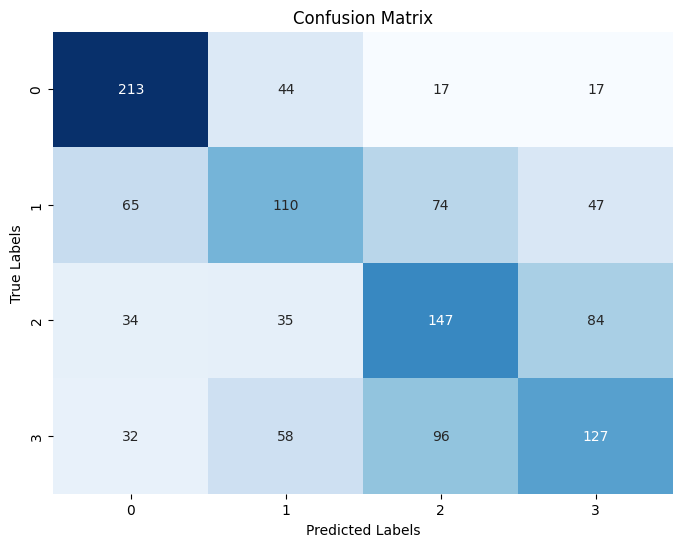

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Fit the model on the training data
gbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gbm = gbm.predict(X_test)

# Compute the accuracy of the GBM model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f'Accuracy of the GBM model: {accuracy_gbm:.2f}')

# Generate the classification report
class_report_gbm = classification_report(y_test, y_pred_gbm)

# Print the classification report
print("Classification Report for GBM:\n", class_report_gbm)

confusion_mat = confusion_matrix(y_test, y_pred_gbm)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Model - 6
## Bagging Classifier

Accuracy of the Bagging model: 0.46
Classification Report for Bagging Classifier:
               precision    recall  f1-score   support

           1       0.54      0.71      0.61       291
           2       0.38      0.37      0.37       296
           3       0.43      0.45      0.44       300
           4       0.45      0.31      0.37       313

    accuracy                           0.46      1200
   macro avg       0.45      0.46      0.45      1200
weighted avg       0.45      0.46      0.45      1200



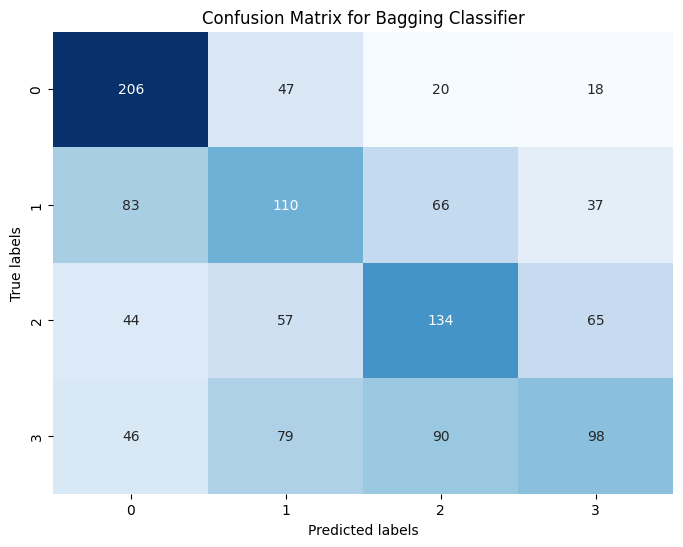

In [90]:
from sklearn.ensemble import BaggingClassifier

# Instantiate a base classifier
base_classifier = DecisionTreeClassifier()

# Instantiate the Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10)

# Fit the model on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bagging = bagging_classifier.predict(X_test)

# Compute the accuracy of the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f'Accuracy of the Bagging model: {accuracy_bagging:.2f}')


# Generate the classification report
class_report_bagging = classification_report(y_test, y_pred_bagging)

# Print the classification report
print("Classification Report for Bagging Classifier:\n", class_report_bagging)

# Compute the confusion matrix
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

## Model - 7
## Voting Classifiers
### i. Hard Voting Classifier
### ii. Soft Voting Classifier

Accuracy of the hard voting classifier: 0.51
Classification Report for Hard Voting:
              precision    recall  f1-score   support

           1       0.56      0.80      0.66       291
           2       0.46      0.37      0.41       296
           3       0.46      0.52      0.49       300
           4       0.51      0.35      0.41       313

    accuracy                           0.51      1200
   macro avg       0.50      0.51      0.49      1200
weighted avg       0.50      0.51      0.49      1200



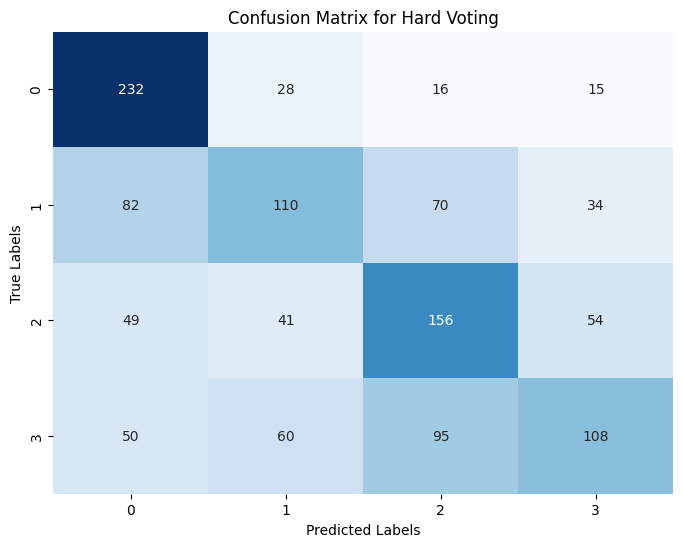

Accuracy of the soft voting classifier: 0.52
Classification Report for Soft Voting:
              precision    recall  f1-score   support

           1       0.60      0.76      0.67       291
           2       0.46      0.34      0.39       296
           3       0.48      0.55      0.51       300
           4       0.53      0.44      0.48       313

    accuracy                           0.52      1200
   macro avg       0.52      0.53      0.51      1200
weighted avg       0.52      0.52      0.51      1200



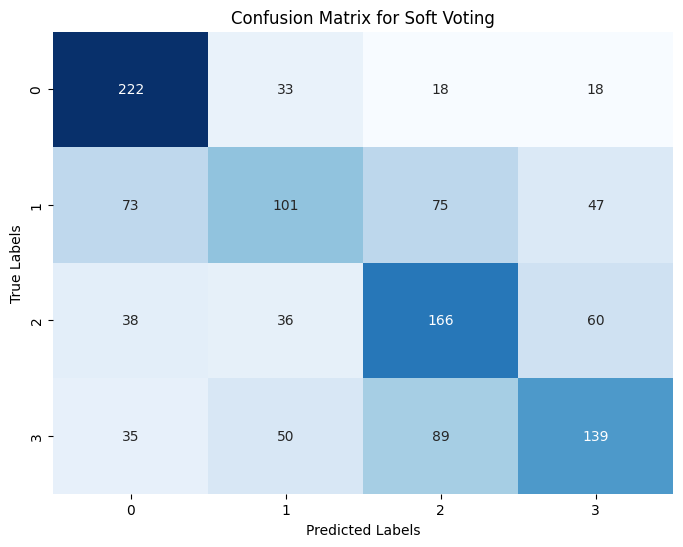

In [91]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier with hard voting
voting_clf_hard = VotingClassifier(estimators=[
    ('gbm', gbm), ('knn', knn), ('svm', svm_classifier), ('bagging', bagging_classifier),('rf', rf_classifier)], voting='hard')

# Fit the hard voting classifier
voting_clf_hard.fit(X_train, y_train)

# Make predictions with hard voting
y_pred_hard = voting_clf_hard.predict(X_test)

# Create a voting classifier with soft voting
voting_clf_soft = VotingClassifier(estimators=[
    ('gbm', gbm), ('knn', knn), ('svm', svm_classifier), ('bagging', bagging_classifier),('rf', rf_classifier)], voting='soft')

# Fit the soft voting classifier
voting_clf_soft.fit(X_train, y_train)

# Make predictions with soft voting
y_pred_soft = voting_clf_soft.predict(X_test)

# Calculate and print the accuracy for hard voting
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f"Accuracy of the hard voting classifier: {accuracy_hard:.2f}")

# Print the classification report for hard voting
print("Classification Report for Hard Voting:")
class_report_hard = classification_report(y_test, y_pred_hard)
print(class_report_hard)

# Generate the confusion matrix for hard voting
confusion_mat_hard = confusion_matrix(y_test, y_pred_hard)

# Create a heatmap of the confusion matrix for hard voting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_hard, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Hard Voting')
plt.show()




# Calculate and print the accuracy for soft voting
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print(f"Accuracy of the soft voting classifier: {accuracy_soft:.2f}")

# Print the classification report for soft voting
print("Classification Report for Soft Voting:")
class_report_soft = classification_report(y_test, y_pred_soft)
print(class_report_soft)

# Generate the confusion matrix for soft voting
confusion_mat_soft = confusion_matrix(y_test, y_pred_soft)

# Create a heatmap of the confusion matrix for soft voting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_soft, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Soft Voting')
plt.show()



> **We are getting subpar accuracy for all the models.
This is because the original dataset was way too large and it was taking more than 2 hours to train a single model.
That's why we randomly choose 1000 records from each of the severity class, The implication of this step was twofolds. 
First it allowed us to train the model with lesser amount of time
Secondly it also tackled the imbalance we had in our dataset**

> **So in order to show that those subpar accuracy was the result of selection of smaller dataset
We'll initialize and train Random Forest once again, and this time we'll train it on the original dataset.
If we keep all the parameter same, everything exaclty the same, we can then prove that those subpar accuracy were down to small data that we selected.**

## Random Forest on Whole Dataset.

Now we'll run the Random Forest Model on whole data. To see the idea of accuracy we could have been able to achive if we had gone with the whole data.

The reason we didn't trained every model on whole dataset is because of low computation power wrt to humongous dataset.

In [92]:
min_value_count = min(copied_data[["Severity"]].value_counts())

In [93]:
min_count = min_value_count
value_counts = copied_data["Severity"].value_counts()
to_drop = []
for val, count in value_counts.items():
    if count > min_count:
        to_drop.extend(copied_data[copied_data["Severity"] == val].sample(count - min_count).index)

one_hot_encoded = pd.get_dummies(copied_data, columns=["Severity"])
balanced_data = one_hot_encoded.drop(to_drop)

# Combining one-hot encoded columns back to a single column
severity_columns = [col for col in balanced_data.columns if col.startswith("Severity")]
balanced_data["Severity"] = balanced_data[severity_columns].idxmax(axis=1).str.replace('Severity_', '')

# Dropping the individual severity columns
balanced_data = balanced_data.drop(columns=severity_columns)

# Checking the value counts of the combined Severity column
print(balanced_data["Severity"].value_counts())

# Checking the shape of the balanced data
print(balanced_data.shape)


Severity
3    63995
1    63995
2    63995
4    63995
Name: count, dtype: int64
(255980, 38)


In [94]:
Y = balanced_data[["Severity"]]
X = balanced_data.drop("Severity", axis = 1)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [96]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [97]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [98]:
y_train["Severity"] = y_train["Severity"].astype(int)
y_test["Severity"] = y_test["Severity"].astype(int)

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.94      0.93     12778
           2       0.72      0.62      0.67     12695
           3       0.72      0.71      0.72     12753
           4       0.74      0.82      0.78     12970

    accuracy                           0.77     51196
   macro avg       0.77      0.77      0.77     51196
weighted avg       0.77      0.77      0.77     51196



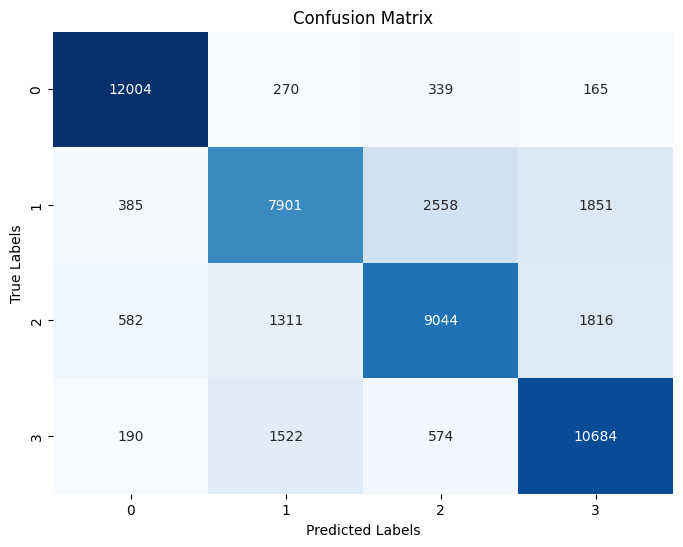

In [99]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


confusion_mat = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Cross Validation
To see if we can extract any more performance from the model.

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}
Best score: 0.7889434806490278
              precision    recall  f1-score   support

           1       0.91      0.95      0.93     12778
           2       0.74      0.61      0.67     12695
           3       0.72      0.72      0.72     12753
           4       0.73      0.84      0.78     12970

    accuracy                           0.78     51196
   macro avg       0.78      0.78      0.77     51196
weighted avg       0.78      0.78      0.77     51196



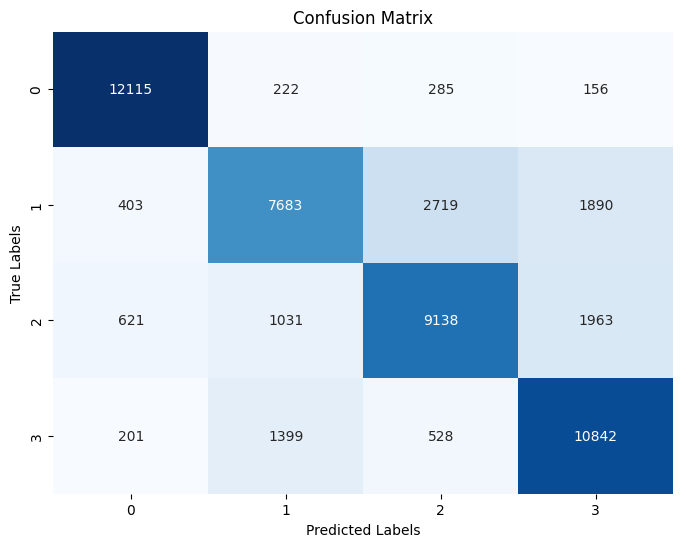

In [100]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

# Make predictions using the best model
best_rf_classifier = random_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))



confusion_mat = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()